<a href="https://colab.research.google.com/github/SHWETASHUKLA2502/GRIP_TSF/blob/main/T1_SHWETA_SHUKLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1: To Explore Supervised Machine Learning**

*  In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.This is a simple linear regression task as it involves just two variables.  


 

# Importing libraries and data

In [ ]:
# Importing all libraries requied
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae

In [ ]:
# Extracting data from given link
url="http://bit.ly/w-data"
data_s=pd.read_csv(url)
data_s.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
data_s.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
# checking for missing values
data_s.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Preparing the Data

In [ ]:
data_s=shuffle(data_s,random_state=42)
div=int(data_s.shape[0]/4)
train=data_s.loc[:3*div+1,:]
test=data_s.loc[3*div+1:]
train.shape,test.shape


((24, 2), (2, 2))

In [ ]:
train.head()

,Hours,Scores
8,8.3,81
16,2.5,30
0,2.5,21
23,6.9,76
11,5.9,62


In [ ]:
test.head()

,Hours,Scores
19,7.4,69
6,9.2,88


In [ ]:
test["simple"]=train["Scores"].mode()[0]
test["simple"].head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


19    30
6     30
Name: simple, dtype: int64

In [ ]:
simple_accuracy=accuracy_score(test["Scores"],test["simple"])
simple_accuracy

0.0

In [ ]:
x=data_s.drop(["Scores"],axis=1)
y=data_s["Scores"]
x.shape,y.shape

((25, 1), (25,))

In [ ]:
x=data_s["Hours"].values.reshape(-1,1)
y=data_s["Scores"].values

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

# Training and Predicting

In [ ]:
# comparing Actual vs Predicted
lin_r=LinearRegression()
lin_r.fit(x_train,y_train)
y_pred=lin_r.predict(x_test)
student=pd.DataFrame({"Actul":y_test,"Predicted":y_pred})
student.head()

,Actul,Predicted
0,24,21.189864
1,27,33.812497
2,17,13.422091
3,86,78.477196
4,47,52.260959


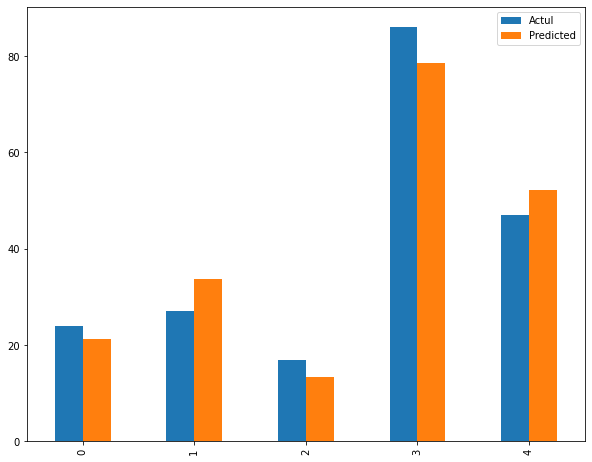

In [ ]:
# visualizing above data for better understanding
student.plot.bar(figsize=(10,8))



*  **What will be predicted score if a student study for 9.25 hrs in a day?** 

    **Let's Check it out**


In [ ]:
hours=9.25
pred=lin_r.predict([[hours]])
print("No of Hours={}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours=9.25
Predicted Score = 92.5562856994045


In [ ]:
# predicting over trains set and calculating error
train_predict=lin_r.predict(x_train)
k=mae(train_predict,y_train)
print("Train Mean Absolute Error",k)

Train Mean Absolute Error 4.904236184655986


In [ ]:
# predicting over test set and calculating error
test_predict=lin_r.predict(x_test)
k=mae(test_predict,y_test)
print("Test Mean Absolute Error",k)

Test Mean Absolute Error 5.1968610566155675


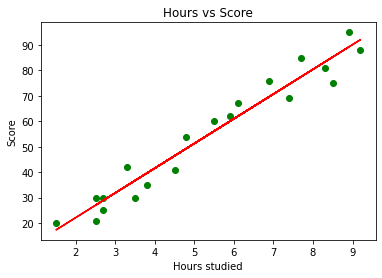

In [ ]:
# Visualising Training Set
plt.scatter(x_train,y_train,color ="g")
plt.plot(x_train,lin_r.predict(x_train),color ="r")
plt.title("Hours vs Score")
plt.xlabel("Hours studied")
plt.ylabel("Score")
plt.show()

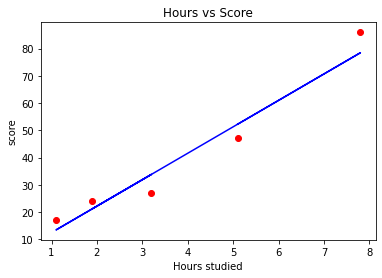

In [ ]:
# Visiualising Testing Set
plt.scatter(x_test,y_test ,color ="r")
plt.plot(x_test, lin_r.predict(x_test), color ="b")
plt.title("Hours vs Score")
plt.xlabel("Hours studied")
plt.ylabel("score")
plt.show()

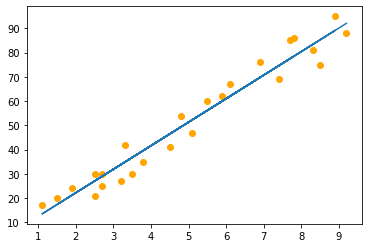

In [ ]:
# Plotting the regression line
line = lin_r.coef_*x+lin_r.intercept_
# Plotting for the test data 
plt.scatter(x, y,color = "orange")
plt.plot(x, line);
plt.show()

In [ ]:
lin_r.coef_

array([9.70971718])

In [ ]:
lin_r.intercept_

2.7414017604472107

In [ ]:
lin_r.score(x_test,y_test)

0.9514625220709427

**Result:**

What will be predicted score if a student study for 9.25 hrs in a day?

*   If a student study for 9.25 hrs in a day,then his predicted score will be aprox. 92.5562856994045

